# GHCNh Hourly Variable Plotting
https://www.ncei.noaa.gov/oa/global-historical-climatology-network/index.html#hourly/access/


https://www.ncei.noaa.gov/oa/global-historical-climatology-network/



Ceph Objects


The following codeblock includes the settings for the data to be accessed.

**endpoint** - This is the endpoint that contains the bucket to be accessed by the notebook.

**bucket** - This is the bucket on the endpoint used to retrieve the given files.

**prefix** - This is the specific prefix where the data can be found in the bucket.

To update the locatiopn of the data, simply update these three variable to match your new data location. This notebook uses boto3 and expects an S3 or Ceph location.

# GHCNh Hourly Variable Plotting
https://www.ncei.noaa.gov/oa/global-historical-climatology-network/index.html#hourly/access/


https://www.ncei.noaa.gov/oa/global-historical-climatology-network/



Ceph Objects


In [26]:
endpoint= 'https://www.ncei.noaa.gov/oa'
bucket = 'global-historical-climatology-network'
prefix = 'hourly/access/by-station/'

It is nessecary to install boto3 to operate this notebook. Boto3 is the AWS SDK for Python. More information can be found here: https://aws.amazon.com/sdk-for-python/

In [27]:
!pip install boto3

In [28]:
#! /usr/bin/env python3

import boto3
from botocore import UNSIGNED
from botocore.config import Config
import sys
import json
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import xarray
import os
import matplotlib.pyplot as plt


client = boto3.client("s3",endpoint_url=endpoint, config=Config(signature_version=UNSIGNED))
response = client.list_objects(Bucket=bucket,Delimiter='/',Prefix=prefix)

stations_and_path = []
station_list = {}
all_stations =  response['Contents']
for station in all_stations:
  stations_and_path.append(station['Key'][-19:-8])
  station_list[station['Key'][-19:-8]] = station['Key']


## Choose a station

This pull down list below will allow you to choose the station to get data from.

In [29]:
stationchoice = widgets.Select(
    options=stations_and_path,
    disabled=False
)
stationchoice

Select(options=('AQC00914594', 'AQC00914902', 'AQL000NSTP6', 'AQW00061705', 'ASW00082101', 'AYW00057401', 'AYW…

## Download file to Notebook

This particular block of code will download the station data to your notbook to access directly.

In [36]:
with open(station_list[stationchoice.value].split("/")[-1], 'wb') as f:
    client.download_fileobj(bucket, station_list[stationchoice.value], f)


## Choose Parameters to plot

Hold command or shift to choose multiple paramaters. These parameters will be loaded into a Pandas Dataframe for access.

In [37]:
path= os.getcwd()
choice = station_list[stationchoice.value].split("/")[-1]
filename = path + '/' + choice
dataframe = pd.read_csv(filename , sep='|', header=0)
parameterchoice = widgets.SelectMultiple(
    options=dataframe.columns.values,
    disabled=False
)
parameterchoice



<ipython-input-37-6f15471230fe>:4: DtypeWarning: Columns (94,95,97,99,100,101,103,105) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(filename , sep='|', header=0)


SelectMultiple(options=('Station_ID', 'Station_name', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Latitude', 'L…

## The Dataframe

This is the data chosen above and loaded into the dataframe for your operations.

In [40]:
dataframe

,Station_ID,Station_name,Year,Month,Day,Hour,Minute,Latitude,Longitude,Elevation,...,precipitation_24_hour_Quality_Code,precipitation_24_hour_Report_Type,precipitation_24_hour_Source_Code,precipitation_24_hour_Source_Station_ID,remarks,remarks_Measurement_Code,remarks_Quality_Code,remarks_Report_Type,remarks_Source_Code,remarks_Source_Station_ID
0,BBW00000408,GRANTLEY ADAMS INTL AP,2019,6,19,11,0,13.0669,-59.4831,52.1,...,NaN,NaN,NaN,NaN,MET07906/19/19 07:00:02 METAR TBPB 191100Z 090...,NaN,F,NaN,343,789540-00408
1,BBW00000408,GRANTLEY ADAMS INTL AP,2019,6,27,16,0,13.0669,-59.4831,52.1,...,NaN,NaN,NaN,NaN,MET06606/27/19 12:00:02 METAR TBPB 271600Z 110...,NaN,F,NaN,343,789540-00408
2,BBW00000408,GRANTLEY ADAMS INTL AP,2019,6,27,17,0,13.0669,-59.4831,52.1,...,NaN,NaN,NaN,NaN,MET06606/27/19 13:00:02 METAR TBPB 271700Z 110...,NaN,F,NaN,343,789540-00408
3,BBW00000408,GRANTLEY ADAMS INTL AP,2019,6,27,18,0,13.0669,-59.4831,52.1,...,NaN,NaN,NaN,NaN,MET06606/27/19 14:00:02 METAR TBPB 271800Z 110...,NaN,F,NaN,343,789540-00408
4,BBW00000408,GRANTLEY ADAMS INTL AP,2019,6,27,19,0,13.0669,-59.4831,52.1,...,NaN,NaN,NaN,NaN,MET06606/27/19 15:00:02 METAR TBPB 271900Z 110...,NaN,F,NaN,343,789540-00408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31607,BBW00000408,GRANTLEY ADAMS INTL AP,2023,5,31,21,0,13.0669,-59.4831,52.1,...,NaN,NaN,NaN,NaN,MET07305/31/23 17:00:02 METAR TBPB 312100Z 150...,NaN,F,NaN,343,789540-00408
31608,BBW00000408,GRANTLEY ADAMS INTL AP,2023,6,1,4,0,13.0669,-59.4831,52.1,...,NaN,NaN,NaN,NaN,MET06606/01/23 00:00:02 METAR TBPB 010400Z 130...,NaN,F,NaN,343,789540-00408
31609,BBW00000408,GRANTLEY ADAMS INTL AP,2023,6,1,5,0,13.0669,-59.4831,52.1,...,NaN,NaN,NaN,NaN,MET06606/01/23 01:00:02 METAR TBPB 010500Z 110...,NaN,F,NaN,343,789540-00408
31610,BBW00000408,GRANTLEY ADAMS INTL AP,2023,6,1,6,0,13.0669,-59.4831,52.1,...,NaN,NaN,NaN,NaN,MET06606/01/23 02:00:02 METAR TBPB 010600Z 100...,NaN,F,NaN,343,789540-00408


## Plotting

This is a simple example of plotting the variables of your requested dataframe. At this point you can plot, manipulate or analyze your data.

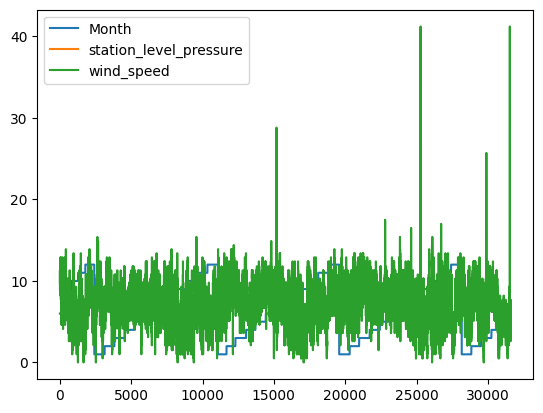

In [41]:
newdf = dataframe.filter(parameterchoice.value)
newdf.plot()
plt.show()

## The new dataframe

**newdf** is the dataframe created with only the parameters you have chosen above.

In [42]:
newdf

,Month,station_level_pressure,wind_speed
0,6,NaN,9.8
1,6,NaN,10.3
2,6,NaN,11.3
3,6,NaN,9.8
4,6,NaN,10.3
...,...,...,...
31607,5,NaN,4.1
31608,6,NaN,4.6
31609,6,NaN,3.6
31610,6,NaN,4.1
